In [29]:
# Chargement et étude rapide du jeu de données Pima
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Charger les données
data = pd.read_csv('heart.csv')
#print(data.head())
#print(data.describe())

In [31]:
# Regarder les données manquantes
data.columns = ['age', 'sex', 'chest pain type', 'resting blood pressure','serum cholestoral','fasting blood sugar','resting electrocardiographic results', 'maximum heart rate achieved', 'exercise induced angina', 'oldpeak', 'the slope of the peak exercise ST segment', 'number of major vessels (0-3) colored by flourosopy', 'thal fixed reversable defect', 'Variable to be predicted']
data.isnull().sum()

age                                                    0
sex                                                    0
chest pain type                                        0
resting blood pressure                                 0
serum cholestoral                                      0
fasting blood sugar                                    0
resting electrocardiographic results                   0
maximum heart rate achieved                            0
exercise induced angina                                0
oldpeak                                                0
the slope of the peak exercise ST segment              0
number of major vessels (0-3) colored by flourosopy    0
thal fixed reversable defect                           0
Variable to be predicted                               0
dtype: int64

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, LeaveOneOut, GroupKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [33]:
# On separe le jeu de donnée en 2 sous-jeu de donnée X et Y
from sklearn import preprocessing
X = data.iloc[:,:13]
y = data.iloc[:,13:]
#print(X)
#print(y)

In [34]:
# On split nos sous-jeu de donnée X et Y en deux groupes Trainning et Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.50)

In [35]:
# Avant d'utiliser nos jeu de donnée X et Y de Trainning et Test nosu devons les normalisés
X_train = preprocessing.normalize(X_train)
print(X_train)

X_test = preprocessing.normalize(X_test)
print(X_test)

[[0.14367399 0.         0.00743141 ... 0.00247714 0.         0.00743141]
 [0.18725397 0.         0.0120809  ... 0.00604045 0.         0.00906068]
 [0.15472611 0.         0.01237809 ... 0.00309452 0.         0.00928357]
 ...
 [0.15378367 0.         0.00549227 ... 0.00549227 0.         0.00823841]
 [0.11423709 0.00271993 0.01087972 ... 0.00543986 0.         0.01631958]
 [0.11933695 0.00265193 0.00530386 ... 0.00265193 0.         0.0079558 ]]
[[0.18193802 0.00336922 0.01347689 ... 0.00673845 0.00336922 0.02358456]
 [0.17852652 0.         0.00297544 ... 0.00297544 0.         0.00892633]
 [0.23745124 0.00389264 0.01557057 ... 0.00778529 0.00389264 0.01167793]
 ...
 [0.12055852 0.         0.00882135 ... 0.00294045 0.         0.00882135]
 [0.138424   0.         0.00971397 ... 0.00242849 0.         0.00728547]
 [0.20375126 0.00308714 0.00617428 ... 0.00617428 0.00926142 0.01852284]]


In [36]:
# Verifiaction du shape des donées de training et de test
print('X_train set:', X_train.shape)
print('X_test set:', X_test.shape)
print('y_train set:', y_train.shape)
print('y_test set:', y_test.shape)

X_train set: (135, 13)
X_test set: (135, 13)
y_train set: (135, 1)
y_test set: (135, 1)


In [37]:
# on train le model 
clf_tree = DecisionTreeClassifier()
clf_reg = LogisticRegression()
clf_tree.fit(X_train, y_train) 
clf_reg.fit(X_train, y_train)

/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [38]:
# Utilisation des modèles sur l’ensemble de données de test
y_score1 = clf_tree.predict_proba(X_test)[:,1]
y_score2 = clf_reg.predict_proba(X_test)[:,1]

In [39]:
# Creation de faux et vrais positifs
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1, pos_label=2)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2, pos_label=2)

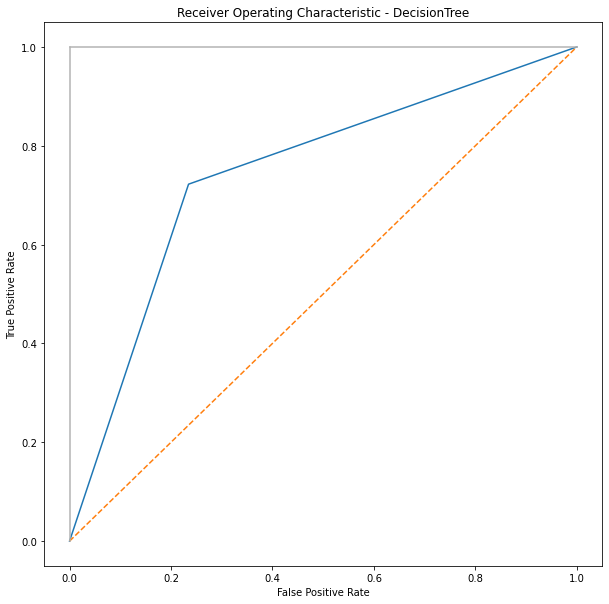

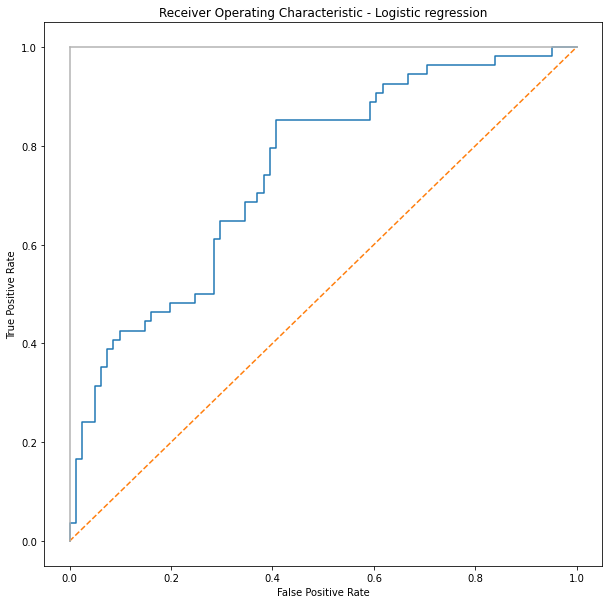

In [40]:
# Afficher le plot ROC
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [41]:
#Cross Validation
val_score = []
for k in range(1,50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train.values.ravel(), cv=5, scoring='accuracy').mean()
    val_score.append(score)

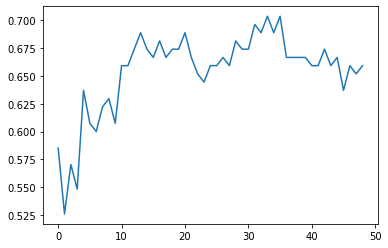

In [42]:
# Afficher le plot de Cross Validation
plt.plot(val_score)
plt.show()

In [43]:
#Validation Curve
from sklearn.model_selection import validation_curve
model = KNeighborsClassifier()
k = np.arange(1, 50)

train_score, val_score_curve = validation_curve(model, X_train, y_train.values.ravel(), 'n_neighbors', k, cv=5)

/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


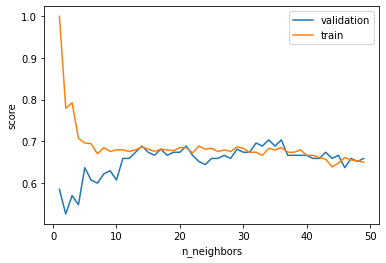

In [44]:
# Afficher le plot de Validation Curve
plt.plot(k,val_score_curve.mean(axis=1),label='validation')
plt.plot(k, train_score.mean(axis=1),label='train')
plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

In [45]:
# Le plot audessus premet de trouver les cas d'OveFitting
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors' : np.arange(1, 50),'metric' : ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)
grid.fit(X_train, y_train)
estimator = grid.fit(X_train, y_train.values.ravel())

/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amir/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

In [46]:
print(grid.best_score_)

0.7333333333333332


In [47]:
grid.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=13)

In [48]:
print(grid.best_params_)

{'metric': 'manhattan', 'n_neighbors': 13}


In [49]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.6888888888888889

In [50]:
confusion_matrix(y_test, model.predict(X_test))

array([[57, 24],
       [18, 36]])

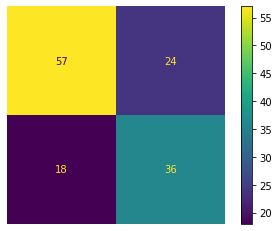

In [51]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid.best_estimator_, X_test, y_test)
plt.axis('off')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

# Utiliser la courbe d’apprentissage pour obtenir des résultats des train et de test avec la taille des train
train_sizes, train_scores, test_scores = learning_curve(estimator=estimator, X=X_train, y=y_train,
                                                       cv=5, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)

# Calcul la moyenne et la variance des training and test scores

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

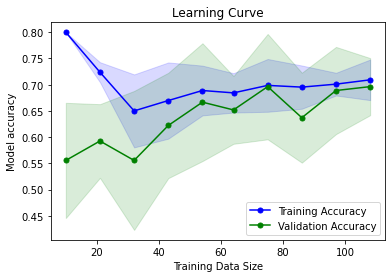

In [54]:
# Plot learning curve
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.grid()
plt.show()